In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

# Load datasets
print("Loading datasets...")
try:
    book_reviews = pd.read_csv('../data/raw/book_reviews/Books_rating.csv', encoding='utf-8-sig')
    financial_news = pd.read_csv('../data/raw/financial_news/all-data.csv', 
                                encoding='latin-1', 
                                header=None, 
                                names=['sentiment', 'text'])
    print("Datasets loaded successfully!")
except Exception as e:
    print(f"Error loading datasets: {e}")

Loading datasets...
Datasets loaded successfully!


In [49]:
print("\n==== BOOK REVIEWS DATASET ====")
print(f"Dataset shape: {book_reviews.shape}")
print("\nColumns:")
print(book_reviews.columns.tolist())
print("\nData types:")
print(book_reviews.dtypes)
print("\nSample data:")
book_reviews.head()


==== BOOK REVIEWS DATASET ====
Dataset shape: (3000000, 10)

Columns:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']

Data types:
Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

Sample data:


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [50]:
# Check for missing values in book reviews
print("\nMissing values in book reviews:")
print(book_reviews.isnull().sum())

# Basic statistics for book reviews
print("\nBasic statistics for numeric columns:")
book_reviews.describe()


Missing values in book reviews:
Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

Basic statistics for numeric columns:


,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [51]:
# Drop the review/text row with null values
book_reviews = book_reviews.dropna(subset=['review/text'])

# Only keep column review/text and review/score
book_reviews = book_reviews[['review/text', 'review/score']]
book_reviews.columns = ['text', 'score']

# Convert score to numeric, forcing errors to NaN
book_reviews['score'] = pd.to_numeric(book_reviews['score'], errors='coerce')

# Group 1, 2 review to 'negative', 3 review to 'neutral', and 4, 5 review to 'positive'
book_reviews['score'] = book_reviews['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

# Check the distribution of scores
print("\nDistribution of scores in book reviews:")
print(book_reviews['score'].value_counts())
print("\nDistribution of scores in book reviews:")
print(book_reviews['score'].value_counts(normalize=True))



Distribution of scores in book reviews:
score
positive    2392951
negative     352746
neutral      254295
Name: count, dtype: int64

Distribution of scores in book reviews:
score
positive    0.797652
negative    0.117582
neutral     0.084765
Name: proportion, dtype: float64


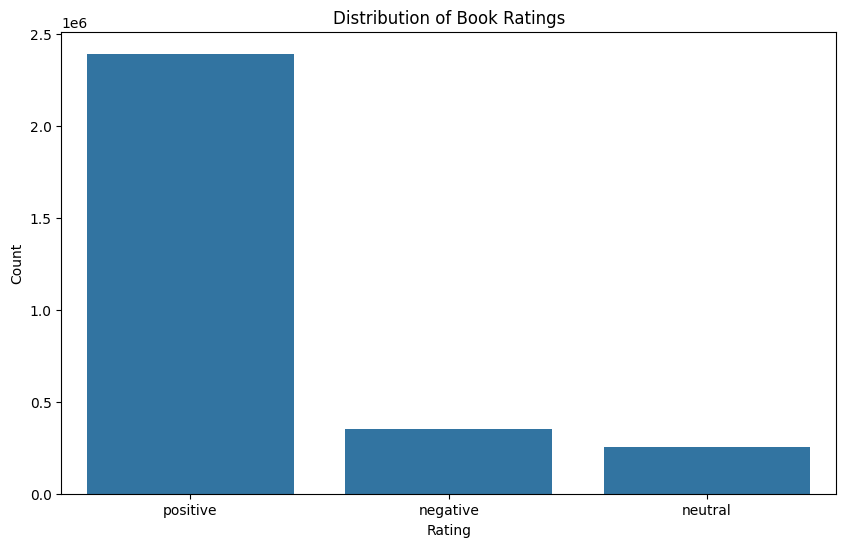

In [52]:
# Explore the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=book_reviews)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Check the most reviewed books
if 'title' in book_reviews.columns:
    top_books = book_reviews['title'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_books.plot(kind='bar')
    plt.title('Top 10 Most Reviewed Books')
    plt.xlabel('Book Title')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [53]:
print("\n==== FINANCIAL NEWS DATASET ====")
print(f"Dataset shape: {financial_news.shape}")
print("\nColumns:")
print(financial_news.columns.tolist())
print("\nData types:")
print(financial_news.dtypes)
print("\nSample data:")
financial_news.head()


==== FINANCIAL NEWS DATASET ====
Dataset shape: (4846, 2)

Columns:
['sentiment', 'text']

Data types:
sentiment    object
text         object
dtype: object

Sample data:


,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [54]:
# Check for missing values in financial news
print("\nMissing values in financial news:")
print(financial_news.isnull().sum())

# Basic statistics for financial news
print("\nBasic statistics for numeric columns (if any):")
financial_news.describe(include='all')


Missing values in financial news:
sentiment    0
text         0
dtype: int64

Basic statistics for numeric columns (if any):


,sentiment,text
count,4846,4846
unique,3,4838
top,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
freq,2879,2


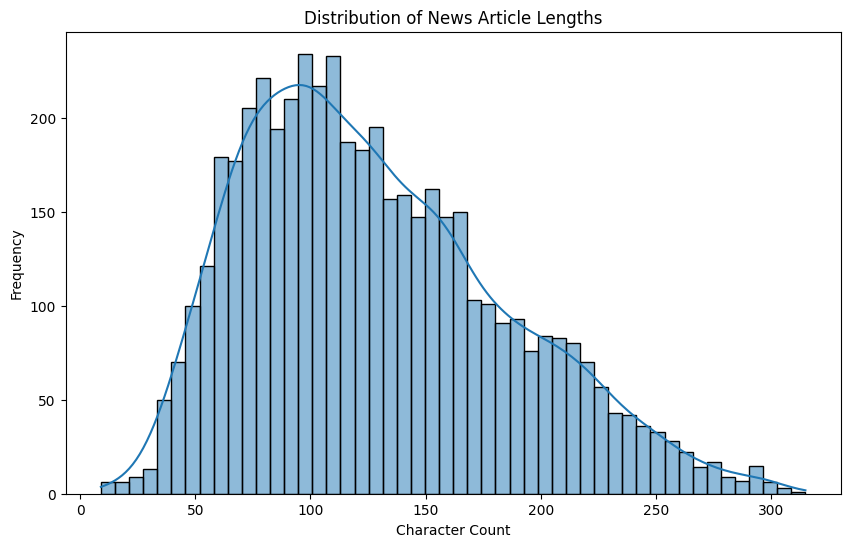

In [55]:
if 'text' in financial_news.columns:
    financial_news['text_length'] = financial_news['text'].str.len()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(financial_news['text_length'].dropna(), bins=50, kde=True)
    plt.title('Distribution of News Article Lengths')
    plt.xlabel('Character Count')
    plt.ylabel('Frequency')
    plt.show()

In [56]:
financial_news = financial_news.drop(columns=['text_length'])
financial_news = financial_news.rename(columns={'sentiment': 'score'})
financial_news = financial_news[['text', 'score']]

In [57]:
# Summary of findings
print("\n==== SUMMARY ====")
print(f"Book Reviews Dataset: {book_reviews.shape[0]} rows and {book_reviews.shape[1]} columns")
print(f"Financial News Dataset: {financial_news.shape[0]} rows and {financial_news.shape[1]} columns")


==== SUMMARY ====
Book Reviews Dataset: 2999992 rows and 2 columns
Financial News Dataset: 4846 rows and 2 columns


# Next step:
- Cleaning text data
- Split train/val/test (70, 15, 15)
- Apply the Text Extractor methods and models to evaluate result

In [58]:
# # In book_reviews data, sample a 1% of the data, keep the same distribution of the class
# book_reviews_sample = book_reviews.groupby('score', group_keys=False).apply(lambda x: x.sample(frac=0.01, random_state=42))
# book_reviews_sample = book_reviews_sample.reset_index(drop=True)
# book_reviews_sample.to_csv('../data/raw/book_reviews/book_reviews_sample.csv', index=False, encoding='utf-8-sig', mode='w+')

In [59]:
import string
import re

def preprocess_review(text):
    """Applies minimal preprocessing to review text."""
    if not isinstance(text, str):
        return "" # Handle potential non-string inputs

    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation (replace with space) - Keep apostrophes if simple
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    # 3. Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [60]:
def preprocess_financial(text):
    """Applies minimal preprocessing to financial text."""
    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [61]:
book_reviews['text'] = book_reviews['text'].apply(preprocess_review)
financial_news['text'] = financial_news['text'].apply(preprocess_financial)

In [62]:
# Keep only 30% of the book reviews data, keepin the same distribution of the class
book_reviews = book_reviews.groupby('score', group_keys=False).apply(lambda x: x.sample(frac=0.25   , random_state=42)) 

C:\Users\ORLab\AppData\Local\Temp\ipykernel_12076\4262001868.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  book_reviews = book_reviews.groupby('score', group_keys=False).apply(lambda x: x.sample(frac=0.25   , random_state=42))


In [63]:
from sklearn.model_selection import train_test_split

book_reviews_train, book_reviews_test = train_test_split(book_reviews, test_size=0.3, random_state=42, stratify=book_reviews['score'])
book_reviews_val, book_reviews_test = train_test_split(book_reviews_test, test_size=0.5, random_state=42, stratify=book_reviews_test['score'])

financial_news_train, financial_news_test = train_test_split(financial_news, test_size=0.3, random_state=42, stratify=financial_news['score'])
financial_news_val, financial_news_test = train_test_split(financial_news_test, test_size=0.5, random_state=42, stratify=financial_news_test['score'])

book_reviews_train.to_csv('../data/processed/book_reviews/book_reviews_train.csv', index=False, encoding='utf-8-sig', mode='w+')
book_reviews_val.to_csv('../data/processed/book_reviews/book_reviews_val.csv', index=False, encoding='utf-8-sig', mode='w+')
book_reviews_test.to_csv('../data/processed/book_reviews/book_reviews_test.csv', index=False, encoding='utf-8-sig', mode='w+')

financial_news_train.to_csv('../data/processed/financial_news/financial_news_train.csv', index=False, encoding='utf-8-sig', mode='w+')
financial_news_val.to_csv('../data/processed/financial_news/financial_news_val.csv', index=False, encoding='utf-8-sig', mode='w+')
financial_news_test.to_csv('../data/processed/financial_news/financial_news_test.csv', index=False, encoding='utf-8-sig', mode='w+')